In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (Condition on trial type)
#### Load data and check data head
##### Use all.csv

In [2]:
# Load data from csv file into a NumPy structured array
data2C = hddm.load_csv('./rt_dataframes/all.csv')
data2C.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
data2C = data2C.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
data2C['rt'] = data2C['rt'] / 1000
data2C.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


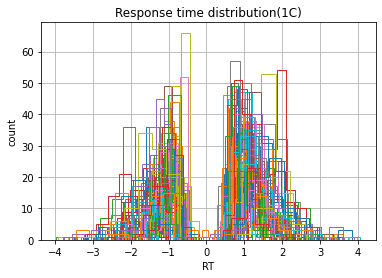

In [4]:
#flip the error RTs to be negative
data2C = hddm.utils.flip_errors(data2C)
# plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(1C)')
for i, subj_data in data2C.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM1C/rt_distribution(1C).png')

## Fitting the hierarchical model for one condition with no subject effects

In [5]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(data2C, depends_on={'a': 'trial_type'}, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname=f'./fitting_results/HDDM/HDDM2C/traces2c(a_trial).db', db='pickle')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1804.8 sec

Plotting a(101)
Plotting a(102)
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


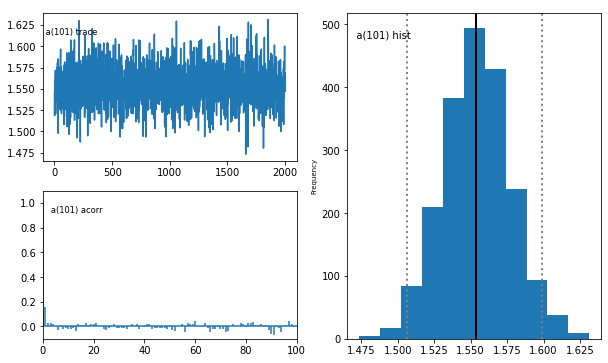

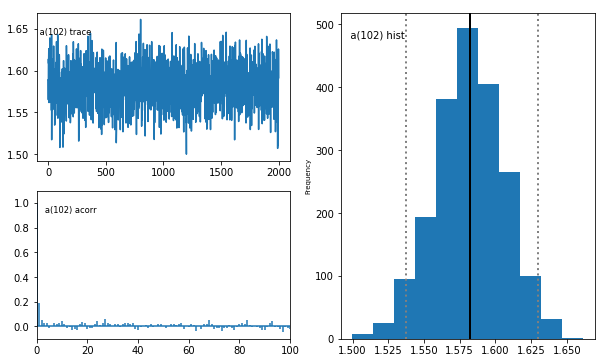

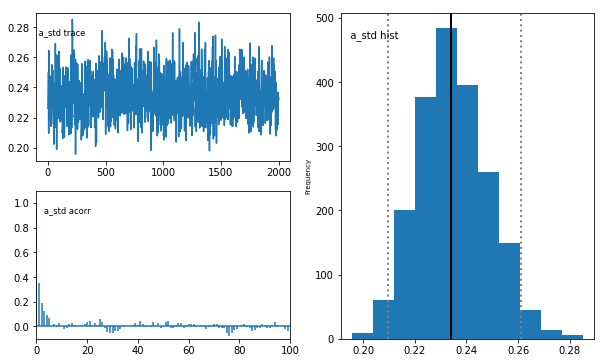

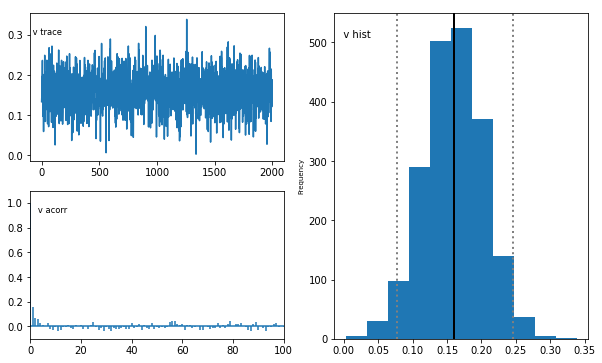

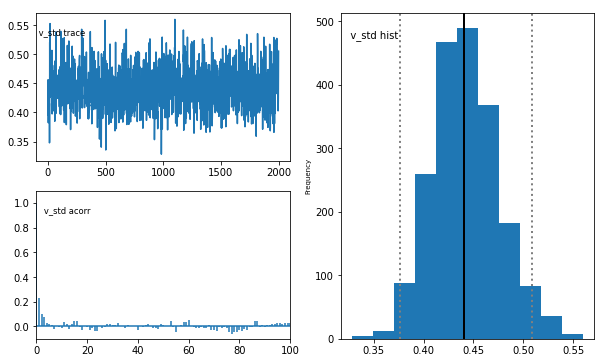

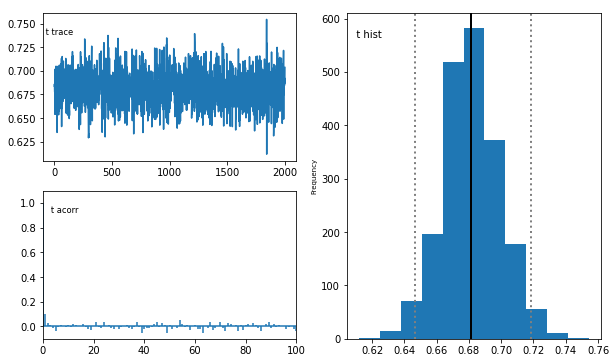

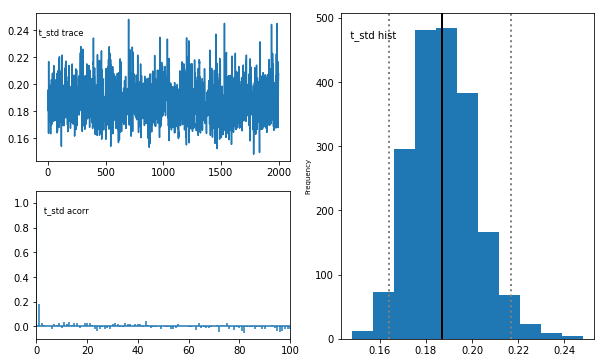

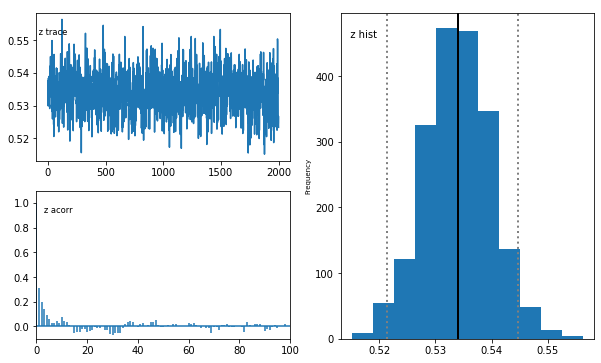

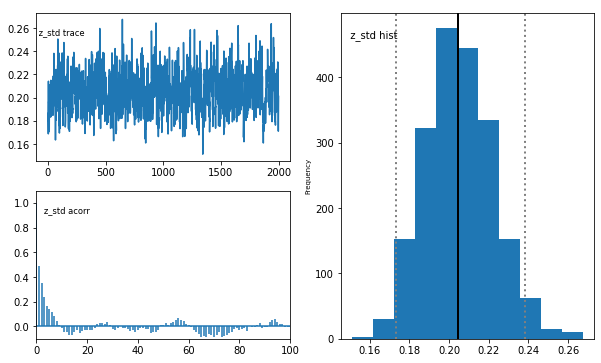

In [8]:
# plot posteriors
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [9]:
stats2Ca = m.gen_stats()
stats2Ca.to_csv('./fitting_results/HDDM/HDDM2C/HDDM2Ca.csv',sep=',')
stats2Ca[stats2Ca.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a_std,0.235075,0.0134783,0.210895,0.225805,0.234221,0.243864,0.262707,0.00048724
v,0.15974,0.0435503,0.072631,0.130958,0.159906,0.189306,0.245348,0.0011592
v_std,0.442525,0.0332917,0.380877,0.420049,0.440404,0.463853,0.515168,0.00101359
t,0.681661,0.017909,0.645809,0.670332,0.681568,0.692897,0.718202,0.000451275
t_std,0.18784,0.0140303,0.164219,0.177837,0.186971,0.196757,0.218206,0.000394216
z,0.53406,0.00587103,0.522258,0.530028,0.534033,0.537977,0.545829,0.000222694
z_std,0.205298,0.0170398,0.174201,0.193349,0.20451,0.216502,0.24011,0.000730103


In [10]:
data = pd.read_csv('./fitting_results/HDDM/HDDM2C/HDDM2Ca.csv', header=None, names=['lable', 'mean', 'std', '2.5q', '25q', '50q', '75q', '97.5q', 'mc err'])
data.dropna(subset=['lable'],inplace=True)
print(data[data['lable'].str.startswith('a')].to_string(index=False, header=True))

                        lable                 mean                   std                 2.5q                  25q                  50q                 75q               97.5q                 mc err
                       a(101)    1.554219545319865   0.02322858800510494    1.508409574656806   1.5389034200450382   1.5540213974559645   1.568930346672038  1.6014113113212596   0.000602767440116858
                       a(102)   1.5819823280707561  0.024055192237403766    1.534460173154687    1.565548587787207   1.5821595179449883  1.5986967654023108  1.6283527945743872  0.0006980462204390664
                        a_std  0.23507487385608136  0.013478290389237913  0.21089540025214926  0.22580512713392709  0.23422105018778205  0.2438644091600262  0.2627065000516724  0.0004872404280239229
 a_subj(101).00aa64fdcb675341   1.3956000788086467   0.06298707500323497   1.2760309796153804   1.3535725612154978   1.3942670506694643  1.4367316669762744   1.521235997612374  0.0018123763074564998
 a_su

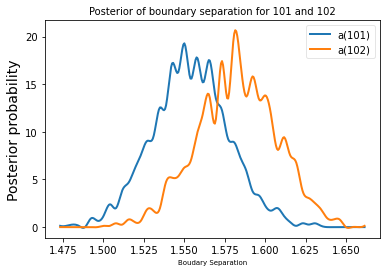

In [11]:
a_101, a_102 = m.nodes_db.node[['a(101)', 'a(102)']]
hddm.analyze.plot_posterior_nodes([a_101, a_102])
plt.xlabel('Boudary Separation', fontsize=7)
plt.ylabel('Posterior probability', fontsize=14)
plt.title('Posterior of boundary separation for 101 and 102', fontsize=10)
plt.savefig('./fitting_results/HDDM/HDDM2C/posterior_a(101,102).png')

In [19]:
m.dic

32422.940047230426

## Check for Model convergence

In [12]:
# Set up models list to append results
models2Ca = list()

In [13]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C/chain2Ca_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C/chain2CaCON_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [14]:
num_chains = 5
data_chains = [(data2C,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models2Ca = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 0Fitting chain 2Fitting chain 1Fitting chain 4Fitting chain 3






/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------99%----------------- ] 2995 of 3000 complete in 1113.7 sec               0%                  ] 3 of 3000 complete in 0.8 sec[                  0%                  ] 3 of 3000 complete in 0.8 sec[                  0%                  ] 3 of 3000 complete in 0.8 sec[                  0%                  ] 5 of 3000 complete in 1.5 sec[                  0%                  ] 5 of 3000 complete in 1.6 sec[                  0%                  ] 5 of 3000 complete in 1.6 sec[                  0%                  ] 5 of 3000 complete in 1.6 sec[                  0%                  ] 5 of 3000 complete in 1.6 sec[                  0%                  ] 7 of 3000 complete in 2.3 sec[                  0%                  ] 7 of 3000 complete in 2.3 sec[                  0%                  ] 7 of 3000 complete in 2.3 sec[                  0%                  ] 7 of 3000 complete in 2.4 sec[                  0%                  ] 7 of 3000 complete in 2.4 sec[                 

In [15]:
models2Ca

In [16]:
results = hddm.analyze.gelman_rubin(models2Ca)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0009482418395306
a_std: 1.0001187374434684
a_subj.00aa64fdcb675341: 1.0000037420288428
a_subj.02535fcf7e16bb56: 1.0084119432667438
a_subj.06c46b112368babf: 1.000582398490694
a_subj.09ba82a2ca814481: 1.0003442905070705
a_subj.0abfc32a4d12c731: 1.0001136516022993
a_subj.0b0a94c202d0b233: 0.9998875956547484
a_subj.0beac20378edac7b: 1.0000088100396125
a_subj.0d894551bc966608: 1.0008266735335476
a_subj.10d15198ac61a404: 1.0000867873888928
a_subj.12a096342c4d052f: 1.0004525738746985
a_subj.13e347e32a454872: 1.0002166668567172
a_subj.15e0c065b2c11595: 0.9998213004397145
a_subj.163b12703c8e5c3c: 1.000232320468349
a_subj.1bf86ff948486447: 1.0001694091125723
a_subj.1cb976bac3a2016b: 0.9999888278240116
a_subj.1ffdcfc59b83c43a: 1.000429748636627
a_subj.221e9f16c114b2c0: 1.0006354174425305
a_subj.22d84796012679e8: 1.0003755702077155
a_subj.247384e4eccc4f80: 1.000282354677735
a_subj.2737c4b829b3018f: 1.0000441599016547
a_subj.27902f23b60a7b76: 1.0002740889006099
a_subj.279cd1540fc8f71f: 1.00030

In [17]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{}

Values smaller than the threshold:
{}


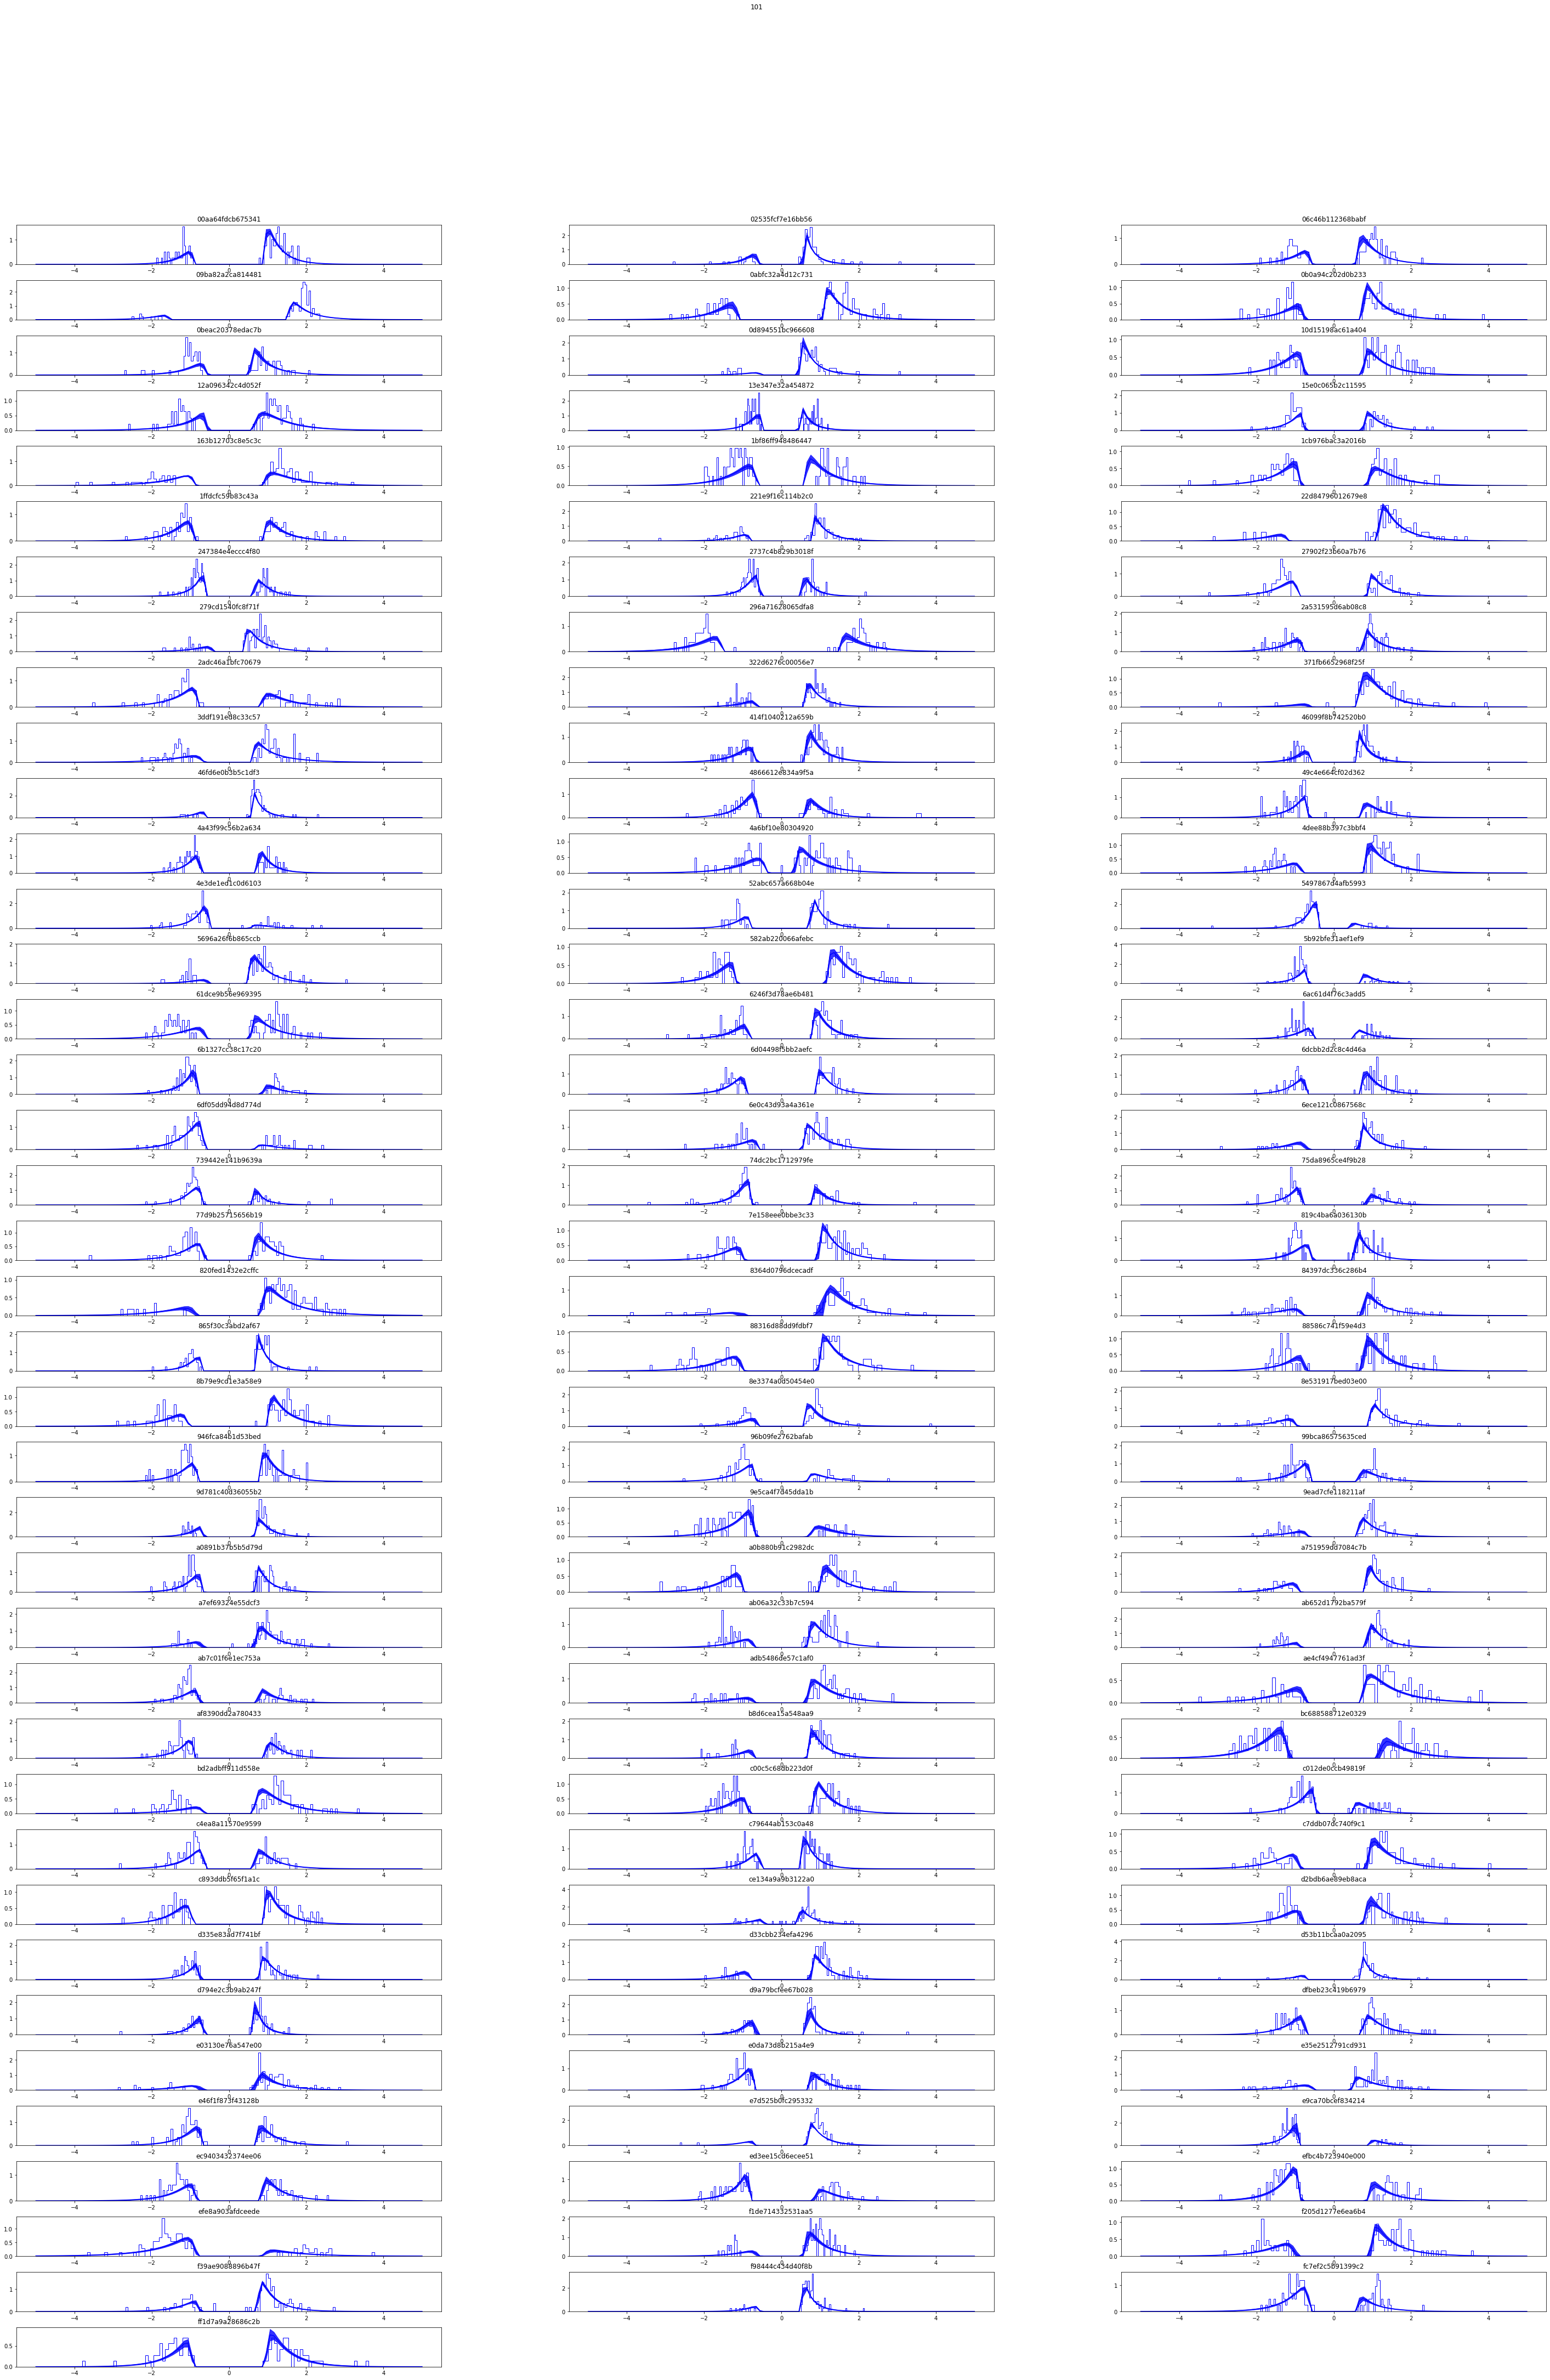

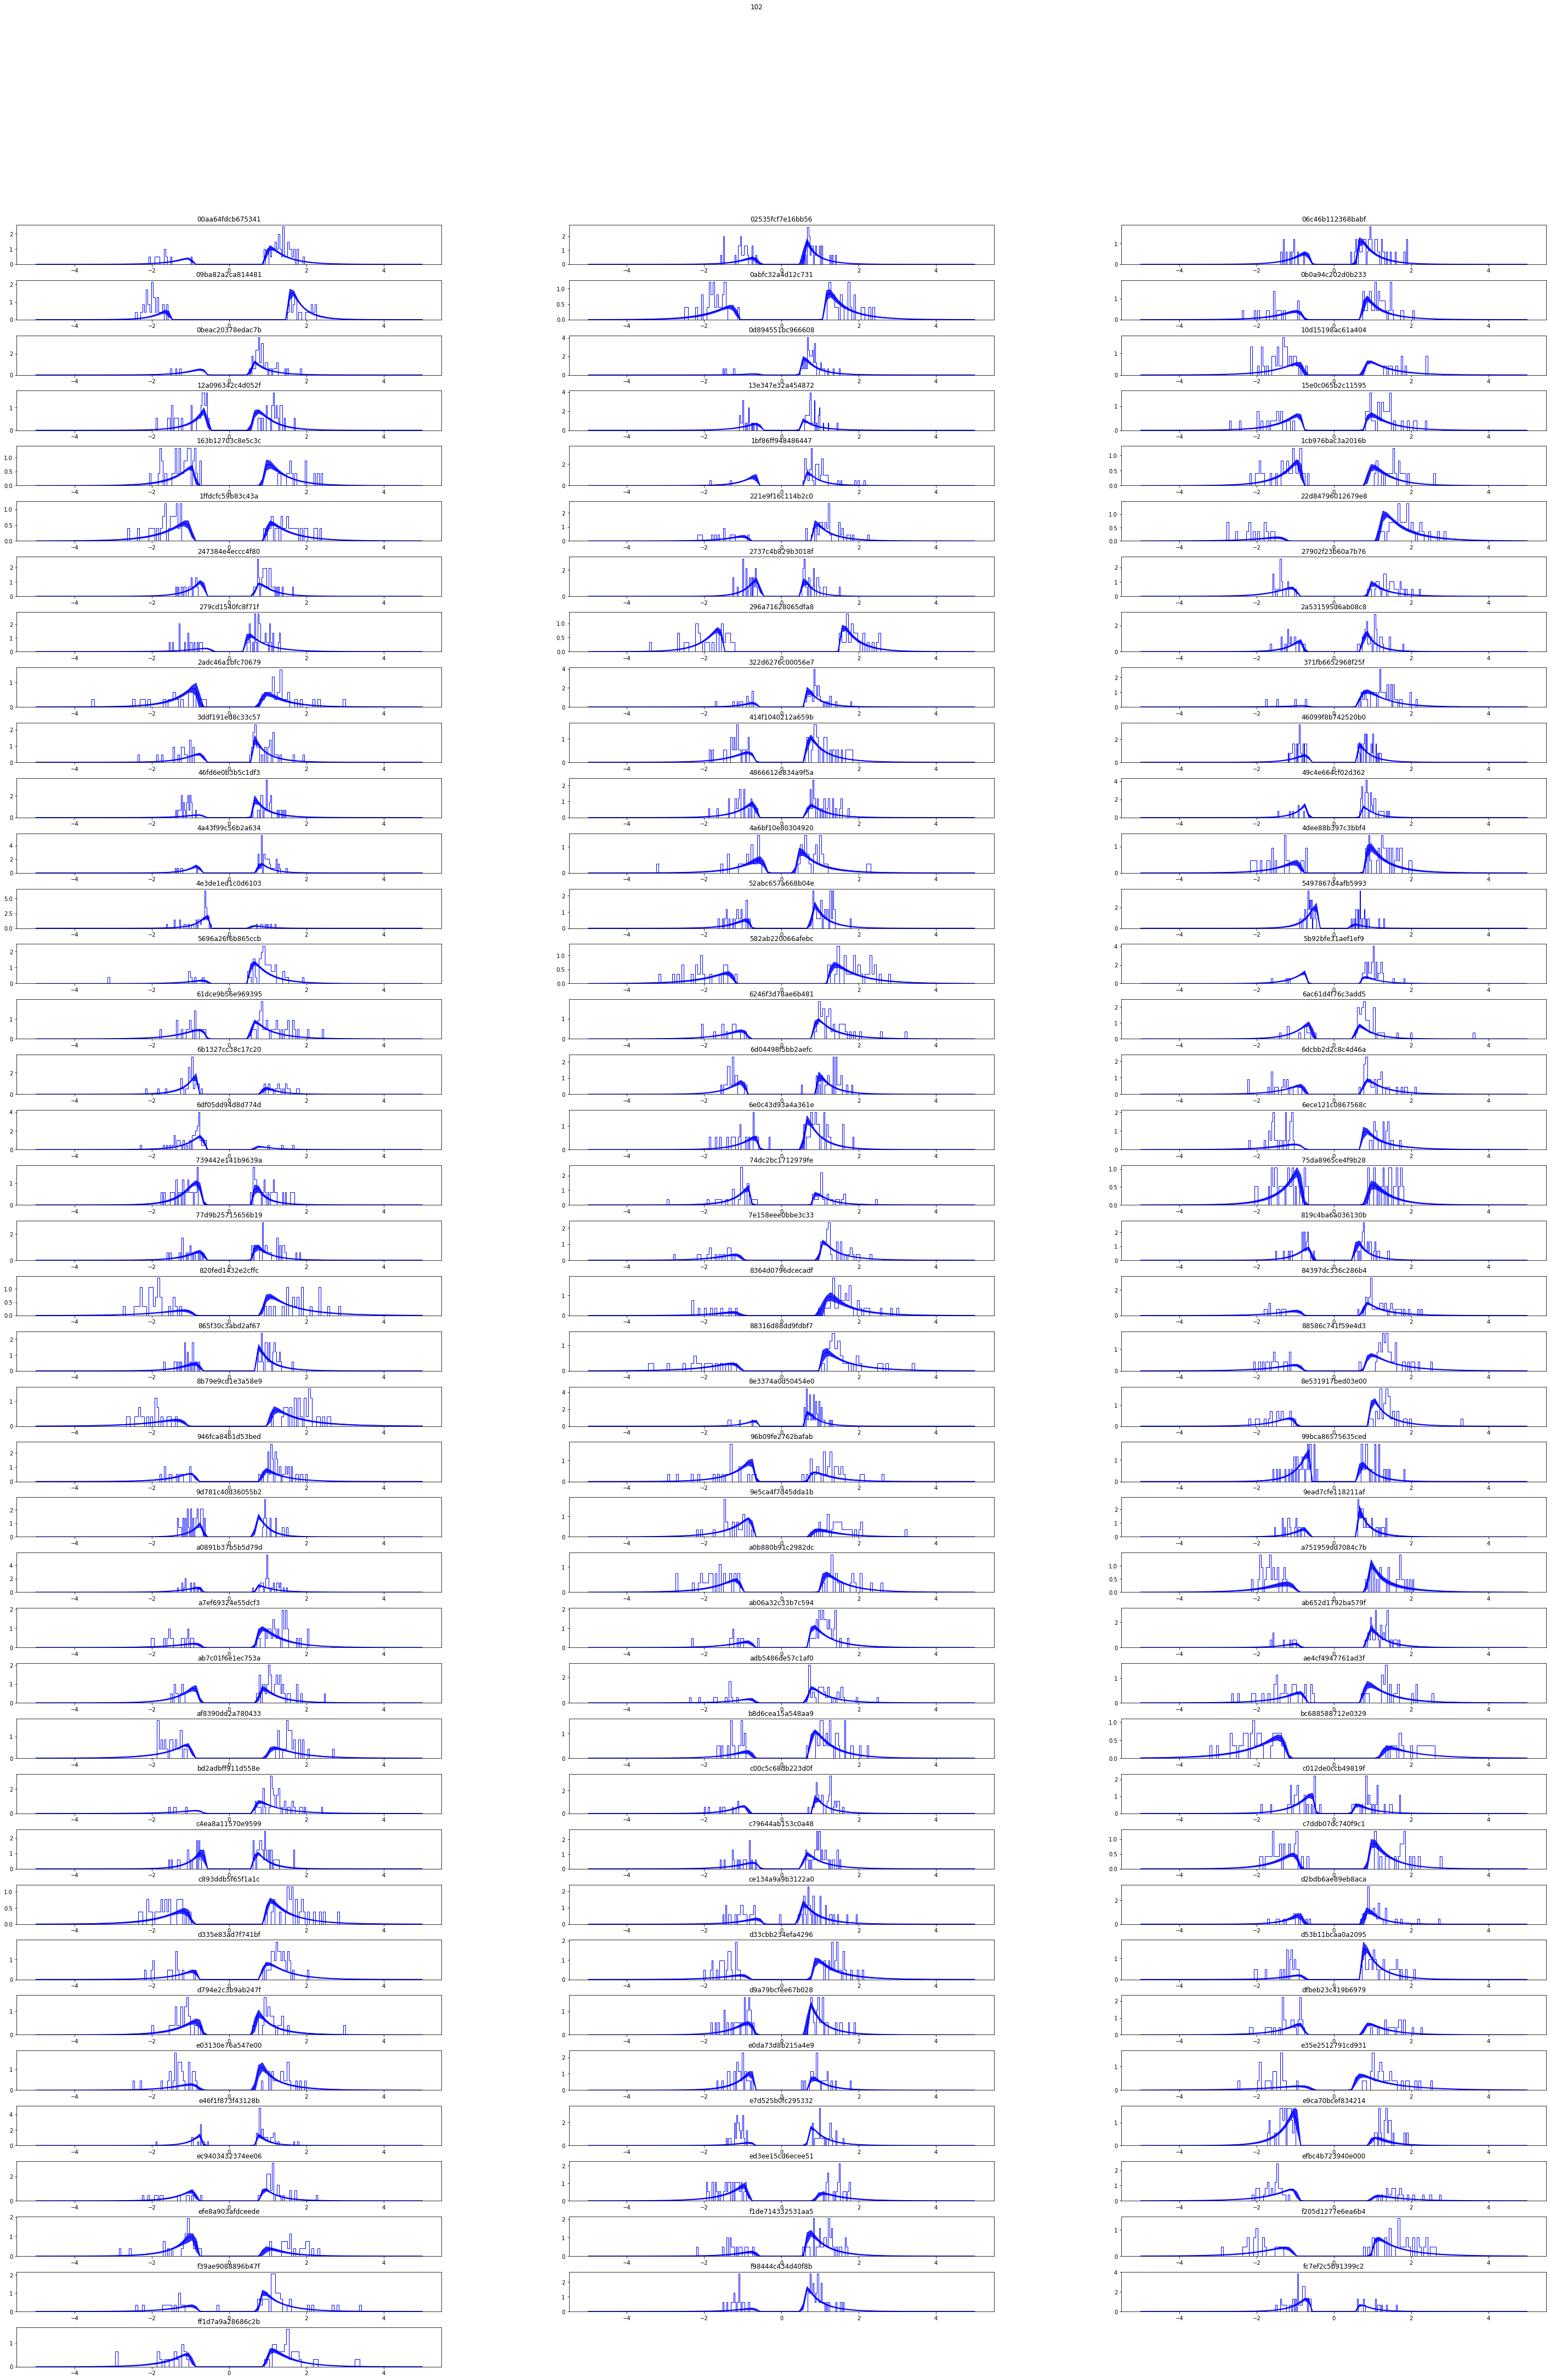

In [18]:
m.plot_posterior_predictive(figsize=(50, 70))